In [3]:

# Importações
from typing import Callable, List, Tuple
import numpy as np
from matplotlib import pyplot as plt

# Funções de DFT e IDFT
def dft_from_samples(x: np.array, n: int, log: bool = False) -> Tuple[np.array, np.array]:
    real_result = np.empty(n)
    imag_result = np.empty(n)

    for i in range(n):
        real_sum = 0
        imag_sum = 0
        if log: print(f"X({i}) = ", end="")
        for k, v in enumerate(x):  # k é o índice atual e v é o valor correspondente em X
            imag = v * np.sin(2 * np.pi * i * k / n)
            real = v * np.cos(2 * np.pi * i * k / n)
            real_sum += real
            imag_sum += imag
            if log: print(f"{v} * [cos(2*pi*{i}*{k}/{n}) + sin(2*pi*{i}*{k}/{n})]\n", end=" + ")

        real_sum = round(real_sum, 4)
        imag_sum = round(imag_sum, 4)
        if log: print(f"\n= {real_sum} + {imag_sum}j\n")

        real_result[i] = real_sum
        imag_result[i] = imag_sum

    return (real_result, imag_result)

def idft(real_result: np.array, imag_result: np.array, n: int, log: bool = False) -> np.array:
    real_econstructed = np.empty(n)
    imag_reconstructed = np.empty(n)

    for k in range(n):
        real_sum = 0
        imag_sum = 0
        if log: print(f"x({k}) = ", end="")
        for i in range(n):
            real = real_result[i] * np.cos(2 * np.pi * i * k / n) + imag_result[i] * np.sin(2 * np.pi * i * k / n)
            imag = imag_result[i] * np.cos(2 * np.pi * i * k / n) - real_result[i] * np.sin(2 * np.pi * i * k / n)
            real_sum += real
            imag_sum += imag
            if log: print(f"({real_result[i]} + {imag_result[i]}j) * [cos(2*pi*{i}*{k}/{n}) - sin(2*pi*{i}*{k}/{n})]\n", end=" + ")
        real_sum = round(real_sum / n, 4)
        imag_sum = round(imag_sum / n, 4)
        if log: print(f"\n= {real_sum} + {imag_sum}j\n")

        real_econstructed[k] = real_sum
        imag_reconstructed[k] = imag_sum

    return real_econstructed

def dft_from_func(func: Callable[[float], float], n: int, log: bool = False) -> Tuple[List[float], List[float]]:
    real_result = []
    imag_result = []

    for i in range(n):
        real_sum = 0
        imag_sum = 0
        if log: print(f"X({i}) = ", end="")
        for k in range(n):
            v = func(k)
            imag = v * np.sin(2 * np.pi * i * k / n)
            real = v * np.cos(2 * np.pi * i * k / n)
            real_sum += real
            imag_sum += imag
            if log: print(f"{v} * [cos(2*pi*{i}*{k}/{n}) + sin(2*pi*{i}*{k}/{n})]\n", end=" + ")
        if log: print(f"\n= {real_sum} + {imag_sum}j\n")

        real_result.append(real_sum)
        imag_result.append(imag_sum)

    return (real_result, imag_result)

def idft_from_func(real_result: Callable[[int], float], imag_result: Callable[[int], float], n: int, log: bool = False) -> List[float]:
    x_real_reconstructed = []
    x_imag_reconstructed = []

    for k in range(n):
        real_sum = 0
        imag_sum = 0
        if log: print(f"x({k}) = ", end="")
        for i in range(n):
            real = real_result(i) * np.cos(2 * np.pi * i * k / n) + imag_result(i) * np.sin(2 * np.pi * i * k / n)
            imag = imag_result(i) * np.cos(2 * np.pi * i * k / n) - real_result(i) * np.sin(2 * np.pi * i * k / n)
            real_sum += real
            imag_sum += imag
            if log: print(f"({real_result(i)} + {imag_result(i)}j) * [cos(2*pi*{i}*{k}/{n}) - sin(2*pi*{i}*{k}/{n})]\n", end=" + ")
        if log: print(f"\n= {real_sum} + {imag_sum}j\n")

        x_real_reconstructed.append(real_sum)
        x_imag_reconstructed.append(imag_sum)

    return x_real_reconstructed


def normalize_dft(reals: np.array, imags: np.array, n: int) -> Tuple[np.array, np.array]:
    half_n = n // 2  # N/2 para a Lei de Nyquist

    normalized_real = np.array([real / half_n for real in reals[:half_n + 1]])
    normalized_imag = np.array([imag / half_n for imag in imags[:half_n + 1]])

    return (normalized_real, normalized_imag)


In [4]:

# Espaço amostral
fs =  8000 #8000 #1920
N = 32 #8 #32
T = N / fs
time = np.linspace(0, T, N, endpoint=False)
_ = [0.3535, 0.3535, 0.6464, 1.0607, 0.3535, -1.0607, -1.3535, -0.3535]
X = [
        0.0,
        6.1982,
        4.6707,
        5.6899,
        4.7456,
        6.4052,
        10.4355,
        10.5058,
        10.4316,
        10.5058,
        10.4355,
        6.4052,
        4.7456,
        5.6899,
        4.6707,
        6.1982,
        0.0000,
        -6.1982,
        -4.6707,
        -5.6899,
        -4.7456,
        -6.4052,
        -10.4355,
        -10.5058,
        -10.4316,
        -10.5058,
        -10.4355,
        -6.4052,
        -4.7456,
        -5.6899,
        -4.6707,
        -6.1982,
    ]


# Cálculos de DFT
signal_on_freq_domain = dft_from_samples(X, N)
normalized_signal = normalize_dft(signal_on_freq_domain[0], signal_on_freq_domain[1], N)
real, imag = normalized_signal

# Fases
fase = np.arctan2(imag, real) + np.pi/2
fase = np.where(fase < 0, fase + 2 * np.pi, fase)
fase = np.where(abs(normalized_signal[0]) > 1e-4, fase, 0)

# Magnitudes
magnitudes = np.sqrt(np.array(signal_on_freq_domain[0])**2 + np.array(signal_on_freq_domain[1])**2)
magnitudes_normalized = np.sqrt(np.array(normalized_signal[0])**2 + np.array(normalized_signal[1])**2)

# Frequencias
frequencies = np.arange(N)
frequencies_normalized = [(fs * k) / N for k in range(int(N/2 + 1))]

# Reconstrução do sinal
signal_reconstructed = idft(signal_on_freq_domain[0], signal_on_freq_domain[1], N)

real = [round(s, 4) for s in signal_on_freq_domain[0]]
imag = [round(s, 4) for s in signal_on_freq_domain[1]]


print(real)
print("----")
print(imag)

[np.float64(0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(-0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(-0.0), np.float64(0.0), np.float64(0.0), np.float64(-0.0), np.float64(-0.0)]
----
[np.float64(0.0), np.float64(160.0), np.float64(-0.0), np.float64(-0.0002), np.float64(-0.0), np.float64(32.0003), np.float64(-0.0), np.float64(22.8567), np.float64(-0.0), np.float64(-0.0001), np.float64(-0.0), np.float64(14.5457), np.float64(-0.0), np.float64(12.3077), np.float64(-0.0), np.float64(0.0001), np.float64(0.0), np.float64(-0.0001), np.float64(0.0), np.float64(-12.3077), np.float64(0.0), np.float64(-14.5457), np.float64(-0.

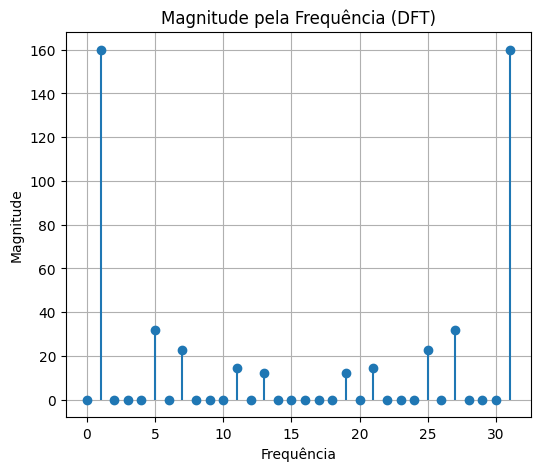

In [5]:
plt.figure(figsize=(6, 5))
plt.stem(frequencies, magnitudes, basefmt=" ")
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.title('Magnitude pela Frequência (DFT)')
plt.grid(True)
plt.show()

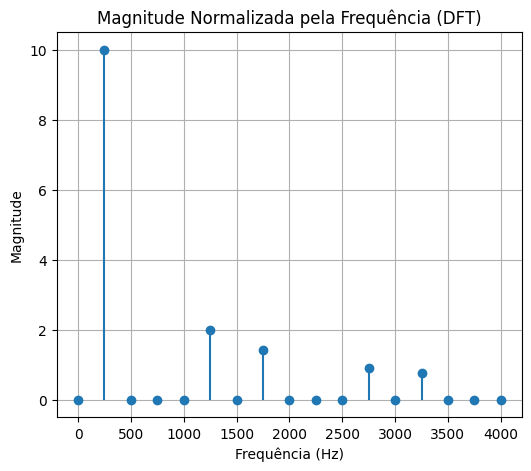

In [6]:
plt.figure(figsize=(6, 5))
plt.stem(frequencies_normalized, magnitudes_normalized, basefmt=" ")
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Normalizada pela Frequência (DFT)')
plt.grid(True)
plt.show()


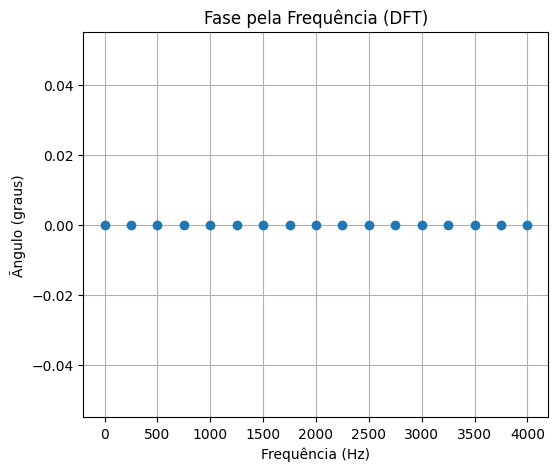

In [7]:
plt.figure(figsize=(6, 5))
plt.stem(frequencies_normalized, fase * 180 / np.pi, basefmt=" ")
plt.xlabel('Frequência (Hz)')
plt.ylabel('Ãngulo (graus)')
plt.title('Fase pela Frequência (DFT)')
plt.grid(True)
plt.show()

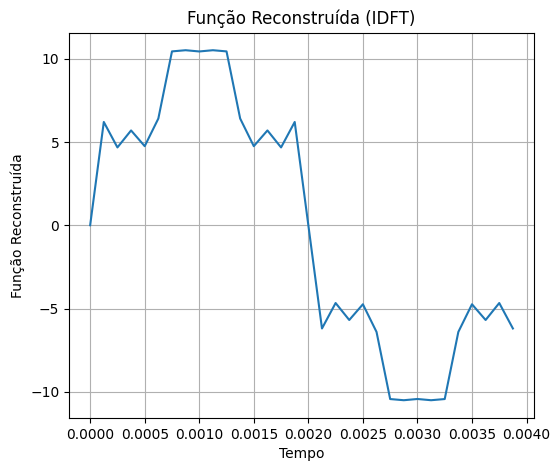

[  0.       6.1982   4.6707   5.6899   4.7456   6.4052  10.4355  10.5058
  10.4316  10.5058  10.4355   6.4052   4.7456   5.6899   4.6707   6.1982
  -0.      -6.1982  -4.6707  -5.6899  -4.7456  -6.4052 -10.4355 -10.5058
 -10.4316 -10.5058 -10.4355  -6.4052  -4.7456  -5.6899  -4.6707  -6.1982]


In [8]:
plt.figure(figsize=(6, 5))
plt.plot(time, signal_reconstructed)
plt.xlabel('Tempo')
plt.ylabel('Função Reconstruída')
plt.title('Função Reconstruída (IDFT)')
plt.grid(True)
plt.show()

print(signal_reconstructed)